In [ ]:
!wget https://github.com/sumantrajoshi/Face-recognition-using-deep-learning/archive/master.zip

--2020-07-12 06:15:39--  https://github.com/sumantrajoshi/Face-recognition-using-deep-learning/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/sumantrajoshi/Face-recognition-using-deep-learning/zip/master [following]
--2020-07-12 06:15:39--  https://codeload.github.com/sumantrajoshi/Face-recognition-using-deep-learning/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [              <=>   ]  29.56M  5.48MB/s    in 5.4s    

2020-07-12 06:15:45 (5.48 MB/s) - ‘master.zip’ saved [30998387]



In [ ]:
!unzip /content/master.zip

Archive:  /content/master.zip
7cf5bc8596fab5d5b820fef7818b979c812dd3f8
   creating: Face-recognition-using-deep-learning-master/
  inflating: Face-recognition-using-deep-learning-master/.gitattributes  
   creating: Face-recognition-using-deep-learning-master/.ipynb_checkpoints/
  inflating: Face-recognition-using-deep-learning-master/.ipynb_checkpoints/BasicFaceRecognizerUsingWebcam-checkpoint.ipynb  
  inflating: Face-recognition-using-deep-learning-master/BasicFaceRecognizerUsingWebcam.ipynb  
  inflating: Face-recognition-using-deep-learning-master/README.md  
   creating: Face-recognition-using-deep-learning-master/__pycache__/
  inflating: Face-recognition-using-deep-learning-master/__pycache__/utils.cpython-36.pyc  
  inflating: Face-recognition-using-deep-learning-master/haarcascade_frontalface_default.xml  
   creating: Face-recognition-using-deep-learning-master/images/
  inflating: Face-recognition-using-deep-learning-master/images/Kunal.jpg  
  inflating: Face-recognition-u

In [ ]:
#https://github.com/iwantooxxoox/Keras-OpenFace

In [ ]:
import os

In [ ]:
os.getcwd()

'/content/Face-recognition-using-deep-learning-master'

In [ ]:
os.chdir('/content/Face-recognition-using-deep-learning-master')

In [ ]:
os.getcwd()

'/content/Face-recognition-using-deep-learning-master'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.engine.topology import Layer
from keras import backend as K
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from utils import LRN2D
import utils

In [ ]:
myInput = Input(shape=(96, 96, 3))

x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = Lambda(LRN2D, name='lrn_1')(x)
x = Conv2D(64, (1, 1), name='conv2')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = Conv2D(192, (3, 3), name='conv3')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
x = Activation('relu')(x)
x = Lambda(LRN2D, name='lrn_2')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# Inception3a
inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
inception_3a_pool = Activation('relu')(inception_3a_pool)
inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

# Inception3b
inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
inception_3b_pool = Activation('relu')(inception_3b_pool)
inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

# Inception3c
inception_3c_3x3 = utils.conv2d_bn(inception_3b,
                                   layer='inception_3c_3x3',
                                   cv1_out=128,
                                   cv1_filter=(1, 1),
                                   cv2_out=256,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(2, 2),
                                   padding=(1, 1))

inception_3c_5x5 = utils.conv2d_bn(inception_3b,
                                   layer='inception_3c_5x5',
                                   cv1_out=32,
                                   cv1_filter=(1, 1),
                                   cv2_out=64,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(2, 2),
                                   padding=(2, 2))

inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

#inception 4a
inception_4a_3x3 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=192,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))
inception_4a_5x5 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_5x5',
                                   cv1_out=32,
                                   cv1_filter=(1, 1),
                                   cv2_out=64,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(1, 1),
                                   padding=(2, 2))

inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)
inception_4a_pool = utils.conv2d_bn(inception_4a_pool,
                                   layer='inception_4a_pool',
                                   cv1_out=128,
                                   cv1_filter=(1, 1),
                                   padding=(2, 2))
inception_4a_1x1 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))
inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

#inception4e
inception_4e_3x3 = utils.conv2d_bn(inception_4a,
                                   layer='inception_4e_3x3',
                                   cv1_out=160,
                                   cv1_filter=(1, 1),
                                   cv2_out=256,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(2, 2),
                                   padding=(1, 1))
inception_4e_5x5 = utils.conv2d_bn(inception_4a,
                                   layer='inception_4e_5x5',
                                   cv1_out=64,
                                   cv1_filter=(1, 1),
                                   cv2_out=128,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(2, 2),
                                   padding=(2, 2))
inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

#inception5a
inception_5a_3x3 = utils.conv2d_bn(inception_4e,
                                   layer='inception_5a_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=384,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))

inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)
inception_5a_pool = utils.conv2d_bn(inception_5a_pool,
                                   layer='inception_5a_pool',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   padding=(1, 1))
inception_5a_1x1 = utils.conv2d_bn(inception_4e,
                                   layer='inception_5a_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))

inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

#inception_5b
inception_5b_3x3 = utils.conv2d_bn(inception_5a,
                                   layer='inception_5b_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=384,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))
inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
inception_5b_pool = utils.conv2d_bn(inception_5b_pool,
                                   layer='inception_5b_pool',
                                   cv1_out=96,
                                   cv1_filter=(1, 1))
inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

inception_5b_1x1 = utils.conv2d_bn(inception_5a,
                                   layer='inception_5b_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))
inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
reshape_layer = Flatten()(av_pool)
dense_layer = Dense(128, name='dense_layer')(reshape_layer)
norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)


# Final Model
model = Model(inputs=[myInput], outputs=norm_layer)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_47 (ZeroPadding2 (None, 102, 102, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   9472        zero_padding2d_47[0][0]          
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 48, 48, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
# Load weights from csv files (which was exported from Openface torch model)
weights = utils.weights
weights_dict = utils.load_weights()

In [ ]:
# Set layer weights of the model
for name in weights:
  if model.get_layer(name) != None:
    model.get_layer(name).set_weights(weights_dict[name])
  elif model.get_layer(name) != None:
    model.get_layer(name).set_weights(weights_dict[name])

In [ ]:
model.save('MyModel')

In [ ]:
def image_to_embedding(image, model):
    #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_AREA) 
    image = cv2.resize(image, (96, 96)) 
    img = image[...,::-1]
    img = np.around(np.transpose(img, (0,1,2))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding

In [ ]:
def recognize_face(face_image, input_embeddings, model):

    embedding = image_to_embedding(face_image, model)
    
    minimum_distance = 200
    name = None
    
    # Loop over  names and encodings.
    for (input_name, input_embedding) in input_embeddings.items():
        
       
        euclidean_distance = np.linalg.norm(embedding-input_embedding)
        

        print('Euclidean distance from %s is %s' %(input_name, euclidean_distance))

        
        if euclidean_distance < minimum_distance:
            minimum_distance = euclidean_distance
            name = input_name
    
    if minimum_distance < 0.68:
        return str(name)
    else:
        return None

In [ ]:

import glob

def create_input_image_embeddings():
    input_embeddings = {}

    for file in glob.glob("images/*"):
        person_name = os.path.splitext(os.path.basename(file))[0]
        image_file = cv2.imread(file, 1)
        input_embeddings[person_name] = image_to_embedding(image_file, model)

    return input_embeddings

def recognize_faces_in_cam(input_embeddings):
    

    cv2.namedWindow("Face Recognizer")
    vc = cv2.VideoCapture(0)
   

    font = cv2.FONT_HERSHEY_SIMPLEX
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    
    while vc.isOpened():
        _, frame = vc.read()
        img = frame
        height, width, channels = frame.shape

        
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        # Loop through all the faces detected 
        identities = []
        for (x, y, w, h) in faces:
            x1 = x
            y1 = y
            x2 = x+w
            y2 = y+h

           
            
            face_image = frame[max(0, y1):min(height, y2), max(0, x1):min(width, x2)]    
            identity = recognize_face(face_image, input_embeddings, model)
            
            

            if identity is not None:
                img = cv2.rectangle(frame,(x1, y1),(x2, y2),(255,255,255),2)
                cv2.putText(img, str(identity), (x1+5,y1-5), font, 1, (255,255,255), 2)
        
        key = cv2.waitKey(100)
        cv2.imshow("Face Recognizer", img)

        if key == 27: # exit on ESC
            break
    vc.release()
    cv2.destroyAllWindows()

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
img = cv2.imread(r'/content/Face-recognition-using-deep-learning-master/pictures/test.jpg')

In [ ]:
frame=img

In [ ]:
height, width, channels = img.shape
      
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = face_cascade.detectMultiScale(gray, 1.3, 5)

In [ ]:
for (x, y, w, h) in img:
  x1 = x
  y1 = y
  x2 = x+w
  y2 = y+h

In [ ]:
input_embeddings = create_input_image_embeddings()

In [ ]:
face_image = frame[max(0, y1):min(height, y2), max(0, x1):min(width, x2)]    
identity = recognize_face(face_image, input_embeddings, model)

Euclidean distance from Neha is 0.83182174
Euclidean distance from Manish is 1.0812479


In [ ]:
if identity is not None:
  img = cv2.rectangle(frame,(x1, y1),(x2, y2),(255,255,255),2)
  cv2.putText(img, str(identity), (x1+5,y1-5), font, 1, (255,255,255), 2)

In [ ]:
import matplotlib.pyplot as plt


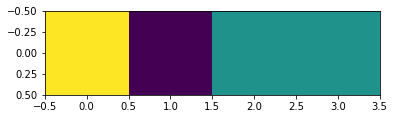

In [ ]:
plt.imshow(img)


In [ ]:
cam = cv2.VideoCapture(0)

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

count = 0
while(True):
    ret, img = cam.read()
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        x1 = x
        y1 = y
        x2 = x+w
        y2 = y+h
        cv2.rectangle(img, (x1,y1), (x2,y2), (255,255,255), 2)     
        count += 1
        # Save the captured image into the datasets folder
        cv2.imwrite("images/User_" + str(count) + ".jpg", img[y1:y2,x1:x2])
        cv2.imshow('image', img)
    k = cv2.waitKey(200) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 10: # Take 30 face sample and stop video
         break
cam.release()
cv2.destroyAllWindows()

In [ ]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
img = cv2.imread(r'/content/Face-recognition-using-deep-learning-master/images/Neha.jpg')

In [ ]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_detector.detectMultiScale(img, 1.3, 5)

In [ ]:
    for (x,y,w,h) in faces:
        x1 = x
        y1 = y
        x2 = x+w
        y2 = y+h
        cv2.rectangle(img, (x1,y1), (x2,y2), (255,255,255), 2)     
        count += 1
        # Save the captured image into the datasets folder
        cv2.imwrite("images/Neha"+ ".jpg", img[y1:y2,x1:x2])
        #cv2.imshow('image', img)

In [ ]:
input_embeddings = create_input_image_embeddings()
recognize_faces_in_cam(input_embeddings)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))